In [177]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Purpose

This notebook is meant to practice analyzing one VA station. 

 

# The Data

In [178]:
master = pd.read_csv("Master/Master.csv")
df = master
df.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Choice_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,0.017927,5.31,2.115538,2.24,0.823529,0.0997,0.0955,0.1133,0.1474,0.0781
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.026059,2.17,0.553571,1.38,0.616071,0.0114,0.0842,0.0891,0.1402,0.0600
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.003997,-0.52,-0.464286,-0.45,-0.511364,0.0620,0.0859,0.0409,0.0814,0.0789
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,0.006944,12.80,7.710843,6.31,5.439655,0.0800,0.0781,0.0898,0.1011,0.0548
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,0.027697,3.09,1.161654,2.50,1.004016,0.0774,0.1134,0.1119,0.0909,0.1343


# The Station

Let's look at Gainesville. It is an incredible outlier with a huge jump in pending cases.

In [179]:
Station = df[df["Station"] == "573"]
station_number = Station["Station"].to_string(index=False)
Station


,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Choice_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15
50,150045,13.93%,9.38,16.55,3.61,573ga,(V08) (573) HCS GAINESVILLE FL,4833.0,4719.0,5116.0,...,0.013716,-3.95,-0.421109,-1.91,-0.270538,0.1129,0.0592,0.0945,0.0707,0.0713


## Marking the station

In [180]:
mark = []
for index, row in df.iterrows():
    if row["Station"] == Station["Station"].to_string(index=False):
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark
    

# Appointments

Station 573 had a bigger increase in pending appointments than the median station by 48.46 percentage points.


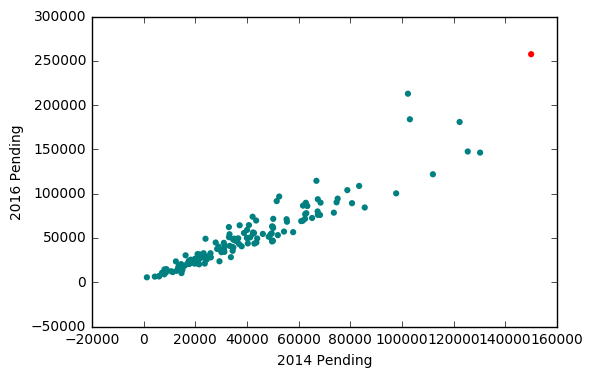

In [181]:
station_pending_increase = (float(Station["Pending_Increase_%"].to_string(index=False))*100) - (df["Pending_Increase_%"].median()*100)


if station_pending_increase > 0 :
    print "Station {} had a bigger increase in pending appointments than the median station by {} percentage points.".format(station_number,round(station_pending_increase,2))
elif station_pending_increase < 0 :
    print "Station {} had a smaller increase in pending appointments than the median station by {} percentage points.".format(station_number,round(station_pending_increase,2))





fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['Appts_Pending_1412'], df['Appts_Pending_1610'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016 Pending")
ax.set_xlabel("2014 Pending")

plt.show()

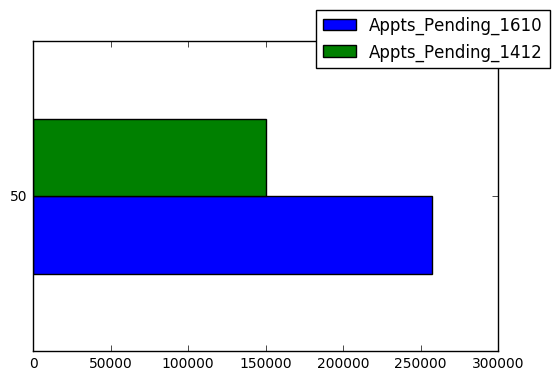

In [182]:
Station[["Appts_Pending_1610","Appts_Pending_1412"]].plot(kind="barh",)

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

Station 573 had a smaller increase in  appointments than the median station by -0.61 percentage points.


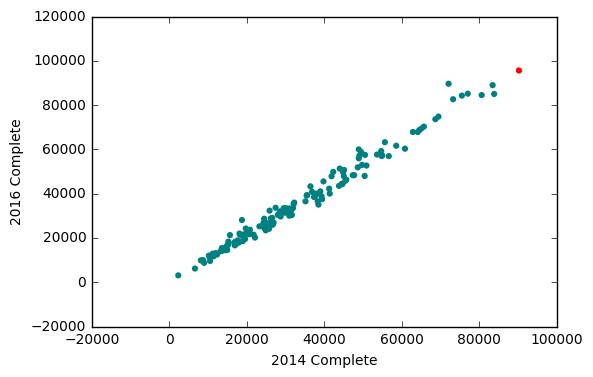

In [183]:
station_complete_increase = (float(Station["Complete_Increase_%"].to_string(index=False))*100) - (df["Complete_Increase_%"].median()*100)


if station_complete_increase > 0 :
    print "Station {} had a bigger increase in  appointments than the median station by {} percentage points.".format(station_number, round((station_complete_increase),2))
elif station_complete_increase < 0 :
    print "Station {} had a smaller increase in  appointments than the median station by {} percentage points.".format(station_number, round((station_complete_increase),2))










fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['Appts_Complete_1409'],df['Appts_Complete_1608'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016 Complete")
ax.set_xlabel("2014 Complete")

plt.show()

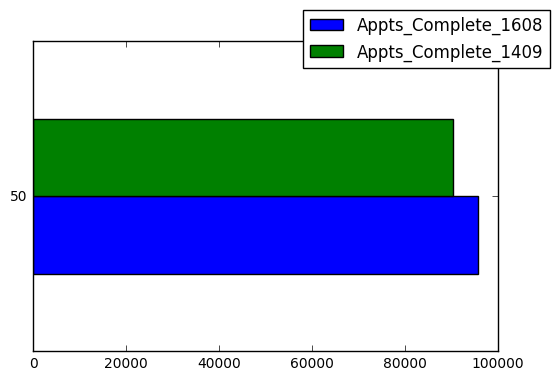

In [184]:
Station[["Appts_Complete_1608","Appts_Complete_1409"]].plot(kind="barh",)

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

# Wait Times

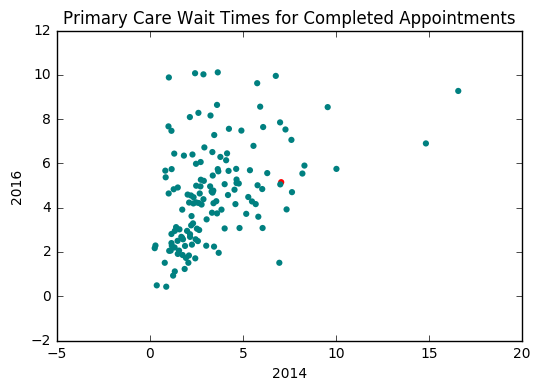

In [185]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Complete_1409'], df['PC_Wait_Complete_1608'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
ax.set_title("Primary Care Wait Times for Completed Appointments")
plt.show()

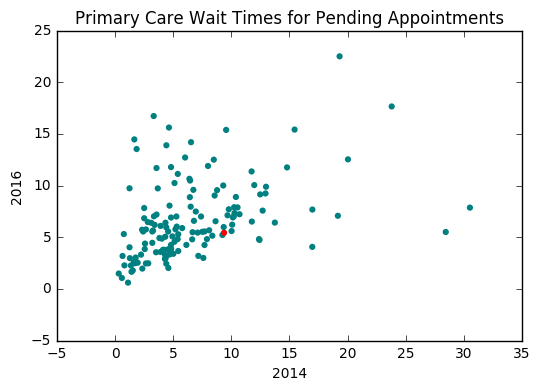

In [186]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Pending_1412'], df['PC_Wait_Pending_1610'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
ax.set_title("Primary Care Wait Times for Pending Appointments")
plt.show()

In [187]:
station_pc_wait_pending_increase = (float(Station["PC_Wait_Pending_Increase_%"].to_string(index=False))*100) - (df["PC_Wait_Pending_Increase_%"].median()*100)

if station_complete_increase > 0 :
    print "Station {} had a bigger increase in  than the median station by {} percentage points.".format(station_number, round((station_pc_wait_pending_increase),2))
elif station_complete_increase < 0 :
    print "Station {} had a smaller increase in  than the median station by {} percentage points.".format(station_number, round((station_pc_wait_pending_increase),2))





Station 573 had a smaller increase in  than the median station by -42.39 percentage points.


# Hiring

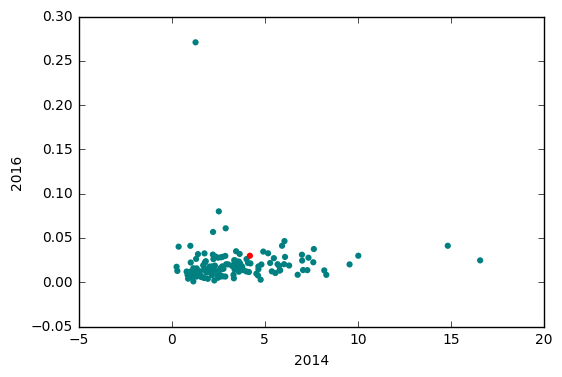

In [188]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Complete_1409'], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
#ax.set_title("Primary Care Wait Times for Completed Appointments")
plt.show()

# Turnover

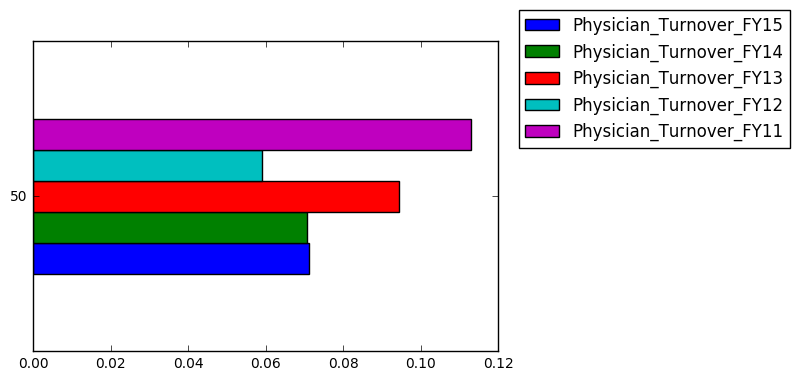

In [243]:
Station[["Physician_Turnover_FY15","Physician_Turnover_FY14","Physician_Turnover_FY13","Physician_Turnover_FY12","Physician_Turnover_FY11"]].plot(kind='barh')

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

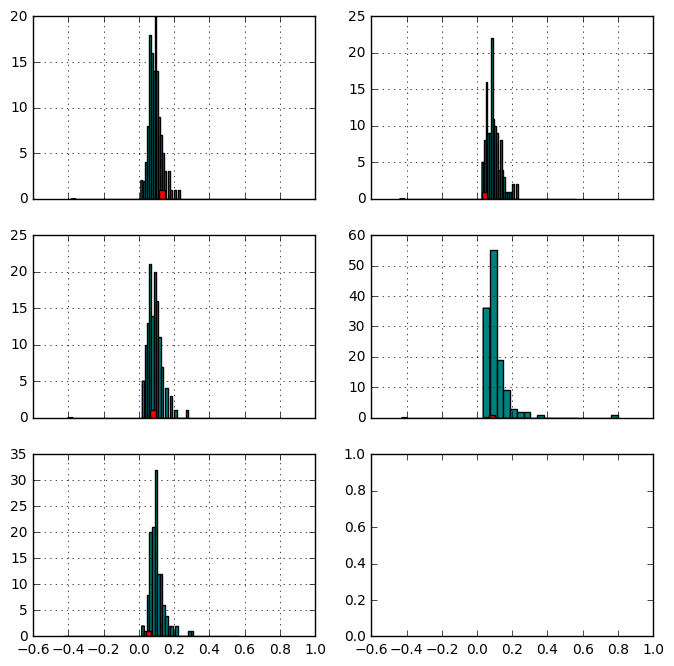

In [263]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(8,8))


df["Physician_Turnover_FY11"].hist(facecolor='teal',bins=20,ax=ax1)
Station["Physician_Turnover_FY11"].hist(facecolor='red',bins=30,ax=ax1)

df["Physician_Turnover_FY12"].hist(facecolor='teal',bins=20,ax=ax2)
Station["Physician_Turnover_FY12"].hist(facecolor='red',bins=30,ax=ax2)

df["Physician_Turnover_FY13"].hist(facecolor='teal',bins=20,ax=ax3)
Station["Physician_Turnover_FY13"].hist(facecolor='red',bins=30,ax=ax3)

df["Physician_Turnover_FY14"].hist(facecolor='teal',bins=20,ax=ax4)
Station["Physician_Turnover_FY14"].hist(facecolor='red',bins=30,ax=ax4)

df["Physician_Turnover_FY15"].hist(facecolor='teal',bins=20,ax=ax5)
Station["Physician_Turnover_FY15"].hist(facecolor='red',bins=30,ax=ax5)

#ax.set

In [ ]:
values = ['Appts_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)